In [1]:
# Dependencies
import csv
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data and visualize it
file_path = os.path.join("generated_data", "city_data.csv")
city_data_df = pd.read_csv(file_path)
city_data_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# load the data and visualize it
file_path_2 = os.path.join("generated_data", "ride_data.csv")
ride_data_df = pd.read_csv(file_path_2)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
# merge both dataframes
merged_df = ride_data_df.merge(city_data_df)
merged_df = merged_df.sort_values(['city'],ascending=True)

#group data by city and get the mean of fare and count of rides and add to a df
group_df = merged_df.groupby('city')
avg_fare = group_df['fare'].mean()
rides_per_city = group_df['ride_id'].count()
relationship_df = pd.DataFrame({'Average Fare' : avg_fare,
                                'Total Number of Rides' : rides_per_city,
                                })
#get city,driver_count, type from city df
drivers_per_city = city_data_df[['city','driver_count', 'type']]
drivers_per_city.set_index('city', inplace=True)

#merge both df's and visualize the result
relationship_df = relationship_df.merge(drivers_per_city, left_index=True, right_index=True)
relationship_df.head()

,Average Fare,Total Number of Rides,driver_count,type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Anitamouth,37.315556,9,16,Suburban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban


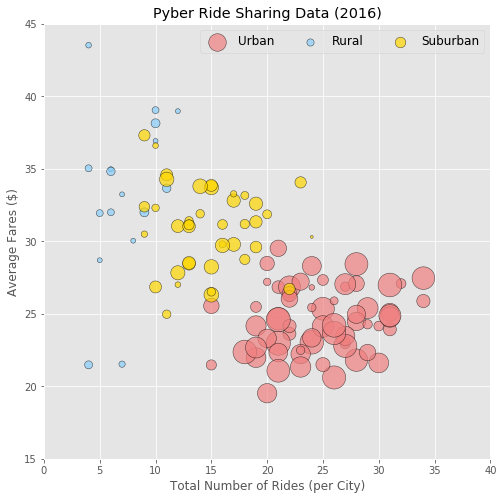

In [15]:
# group data by city type to generate handles for the plot
city_type_df = relationship_df
city_type_df = city_type_df.reset_index()
city_type_df.set_index('type', inplace=True)
urban_df = city_type_df.loc['Urban']
suburban_df = city_type_df.loc['Suburban']
rural_df = city_type_df.loc['Rural']

# create the scatter plot
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
urban = plt.scatter(urban_df['Total Number of Rides'], urban_df['Average Fare'], s=urban_df['driver_count']*8, c = "lightcoral", alpha=0.7, edgecolors="black")      
rural = plt.scatter(rural_df['Total Number of Rides'], rural_df['Average Fare'], s=rural_df['driver_count']*8, c = "lightskyblue" , alpha=0.7, edgecolors="black")
suburban = plt.scatter(suburban_df['Total Number of Rides'], suburban_df['Average Fare'], s=suburban_df['driver_count']*8, c = "gold", alpha=0.7, edgecolors="black")
plt.legend((urban,rural,suburban),
           ("Urban","Rural","Suburban"),
           scatterpoints=1,
           loc='best',
           ncol=5,
           fontsize=12)
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim(0,40)
plt.ylim(15,45)
plt.show()

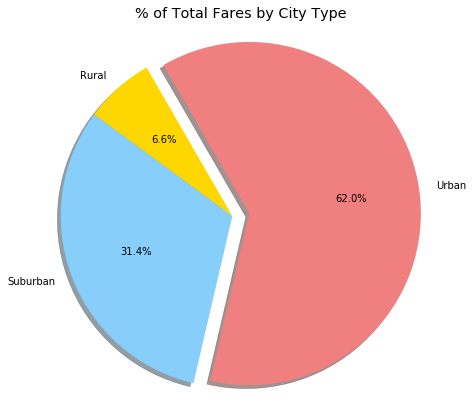

In [6]:
# % of total fare by city Type
grouped_df = merged_df
grouped_df = grouped_df.groupby([ 'type'])
total_fare_series = grouped_df['fare'].sum()
percent_total_fare = pd.DataFrame({"Total Fare": total_fare_series,})
total_fare = percent_total_fare['Total Fare'].sum()
percent_total_fare["Percent"] = percent_total_fare["Total Fare"]/total_fare * 100

#plot a pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(percent_total_fare["Percent"], explode=explode, labels=["Rural", "Suburban", "Urban"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

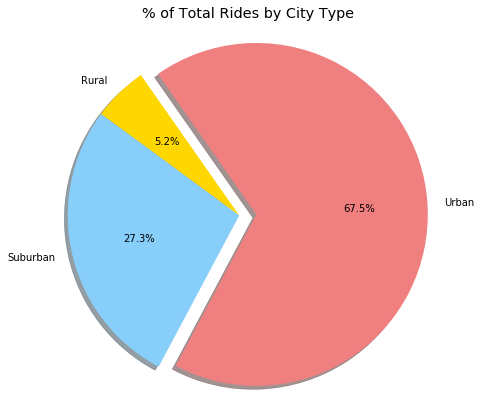

In [7]:
#% of Total Rides by City Type
type_grouped_df = merged_df.groupby([ 'type'])
total_rides_series = grouped_df['ride_id'].count()
total_rides_series
percent_total_rides = pd.DataFrame({"Total Rides": total_rides_series,})
total_rides = percent_total_rides['Total Rides'].sum()
percent_total_rides["Percent"] = percent_total_rides["Total Rides"]/total_rides * 100
percent_total_rides

#plot a pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(percent_total_rides["Percent"], explode=explode, labels=["Rural", "Suburban", "Urban"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

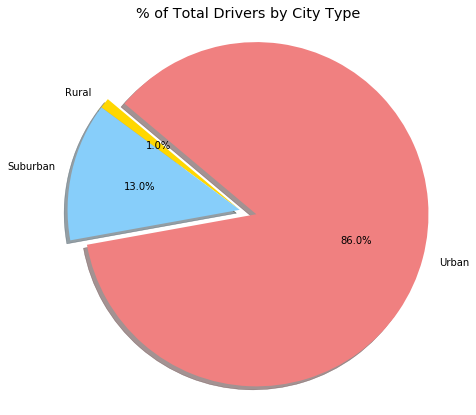

In [8]:
# % of Total Drivers by City Type
type_grouped_city_df = city_data_df
type_grouped_df = type_grouped_city_df.groupby([ 'type'])
total_drivers_series = grouped_df['driver_count'].sum()

percent_total_drivers = pd.DataFrame({"Total Drivers": total_drivers_series,})
total_drivers = percent_total_drivers['Total Drivers'].sum()
percent_total_drivers["Percent"] = percent_total_drivers["Total Drivers"]/total_drivers * 100

#plot a pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.1]
plt.figure(figsize=(7,7))
plt.pie(percent_total_drivers["Percent"], explode=explode, labels=["Rural", "Suburban", "Urban"], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()